<a href="https://colab.research.google.com/github/KaiaX926/P-MNIST-milestone/blob/main/5241_project_0423_13pm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4. Deep learning

In [ ]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
import time
import numpy as np
from sklearn.metrics import accuracy_score
from tqdm import trange
from time import sleep
import seaborn as sns
from torchvision import datasets
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [ ]:
def errorrate(y_pred, y_true):
    error = sum([y_pred[i]!=y_true[i] for i in range(len(y_true))])
    return error/len(y_true)

def CrossEntropy(y_pred, y_true):
    if y_true == 1:
      return -np.log(y_pred)
    else:
      return -np.log(1 - y_pred)
    return mean_bce_loss

In [ ]:
# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20

# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# choose the training and test datasets
train_data = datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform)#.to(device)
test_data = datasets.MNIST(root='data', train=False,
                                  download=True, transform=transform)#.to(device)
train_subset, val_subset = torch.utils.data.random_split(
        train_data, [50000, 10000], generator=torch.Generator().manual_seed(1))

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    num_workers=num_workers)


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


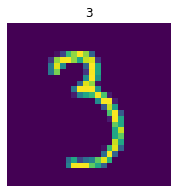

In [ ]:
X_test = test_data . test_data . numpy ()
Y_test = test_data . test_labels . numpy ()
image_idx = np.random.choice(range(X_test.shape[0]))
image = X_test[image_idx]
image_class = Y_test[image_idx]
plt.figure(figsize=(3, 3))
plt.imshow(X_test[image_idx].astype("uint8"))
plt.title(image_class)
_ = plt.axis("off")

In [ ]:
# Define the model
# import libraries
# define the NN architecture
class Net1(nn.Module):
    def __init__(self):
        super(Net1, self).__init__()
        hidden_1 = 100
        self.fc1 = nn.Linear(28 * 28, hidden_1)
        self.output = nn.Linear(hidden_1, 10)

        #self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28 * 28)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))

        # add output layer
        x = self.output(x)
        return x

# initialize the NN
model_1 = Net1()
model_1 = model_1.to(device)
# model.cuda()
print(model_1)

Net1(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (output): Linear(in_features=100, out_features=10, bias=True)
)


In [ ]:
def tt(seed, model, prefix, lr = 0.1, monm = 0, criterion = nn.CrossEntropyLoss()):
    torch.manual_seed(seed)
    # model = Net()
    # model = model.to(device)

    optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=monm)

    model.train() 
    LOSS, train_ACC, test_ACC  = [],[],[]
    for epoch in trange(n_epochs, desc='New trial'):
        sleep(0.01)
        # monitor training loss
        train_loss = 0.0
        t0 = time.time()
        ###################
        # train the model #
        ###################
        for data, target in train_loader: #train_loader:train_labels = to_categorical(Y_train)
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()

            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()*data.size(0)
                
        # print training statistics 
        # calculate average loss over an epoch
        train_loss = train_loss/len(train_loader)
        LOSS.append(train_loss)


        train_error = 0
        for traindata, traintarget in train_loader:
            traindata = traindata.to(device)
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(traindata)
            _, pred = torch.max(output, 1)
            pred = pred.cpu().numpy()
            train_error += errorrate(pred,traintarget.numpy())/len(train_loader)
        train_ACC.append(train_error)

        test_error = 0
        for testdata, testtarget in test_loader:
            testdata = testdata.to(device)
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(testdata)
            _, pred = torch.max(output, 1)
            pred = pred.cpu().numpy()
            test_error += errorrate(pred,testtarget.numpy())/len(test_loader)
        test_ACC.append(test_error)
        

        # print('Epoch: {} \tEpoch runtime: {:.2f} \tTraining Loss: {:.6f} \tTest Loss:{:.6f}'.format(
        #     epoch+1, 
        #     time.time() - t0,
        #     train_error,
        #     test_error
        #     ))

        
        # name = f"/content/{prefix}_{seed}_{lr}_{monm}.pt" #.onnx
        # torch.save(model, name)
        # model_scripted = torch.jit.script(model) # Export to TorchScript
        # model_scripted.save(name) 
        # torch.onnx.export(model, data, name, verbose=True,
        #                   operator_export_type=torch.onnx.OperatorExportTypes.ONNX,example_outputs=target) 
        
    return model, LOSS, train_ACC, test_ACC
    

# cnn_accuracy = accuracy_score(Y_test, cnn_prediction)
# print('FINAL Test Error of a CNN is: ', errorrate(cnn_prediction,Y_test))
# print('FINAL Accuracy_score of a CNN is: ', cnn_accuracy)

In [ ]:
def draw_path(trial, subs, n_epochs, train_acc, test_acc):
    fig, axes = plt.subplots(1, subs, figsize=(subs*6, 5))
    fig.suptitle('NN - 1 hidden layer')
    for i in range(len(trial)):
        # ax = 
        axes[i].set_title(trial[i])
        sns.lineplot(ax=axes[i], x = list(range(n_epochs)), y = train_acc[i], color = 'orange', label='train')
        # ax = ax.twinx()
        # axes[i] = plt.twinx()
        sns.lineplot(ax=axes[i], x = list(range(n_epochs)), y = test_acc[i], label='test')

In [ ]:
def draw_path_avg(n_epochs, train_acc, test_acc):
    train_acc_avg = np.mean(train_acc, axis=0)
    test_acc_avg = np.mean(test_acc, axis=0)

    fig, axes = plt.subplots(1, 1, figsize=(10, 6))
    fig.suptitle('NN - 1 hidden layer - mean misclassification error v.s. iteration')
    sns.lineplot( x = list(range(n_epochs)), y = train_acc_avg, color = 'orange', label='train')
    sns.lineplot( x = list(range(n_epochs)), y = test_acc_avg, label='test')


## 3.(a)
How does the network’s performance differ on the training set versus
the validation set during learning? Use the plot of training and testing error curves to
support your argument.

A: The training error are always lower than testing error while the elbow of the curve shows around the same iteration.

In [ ]:
n_epochs = 150
cnn1_accuracy_summary = []
train_acc, test_acc = [],[]
lr = 0.1

trial = [123,234,345,456,567]
for seed in trial:
    model_1 = Net1()
    model_1 = model_1.to(device)
    model, LOSS, train_ACC, test_ACC = tt(seed, model_1,'modelNN1')
    if len(test_acc) == 0:
        best_model = model
    else:
        if test_acc[-1][-1] > test_ACC[-1]:
            best_model = model
    train_acc.append(train_ACC)
    test_acc.append(test_ACC)

prefix = 'modelNN1'
name = f"/content/best_{prefix}.pt" #.onnx
torch.save(best_model, name)

New trial: 100%|██████████| 150/150 [32:30<00:00, 13.00s/it]


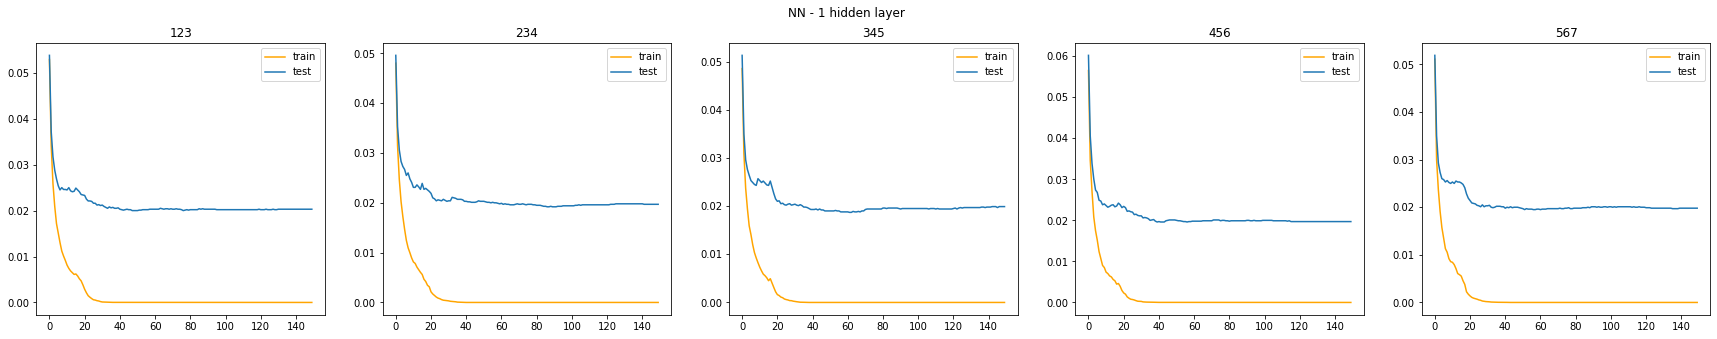

In [ ]:
draw_path(trial, 5, n_epochs, train_acc, test_acc)

A: 

## 3.(b)
We could implement an alternative performance measure to the cross entropy, the mean
miss-classification error.
Plot the classification error (in percentage) vs. number of epochs, for
both training and testing. Do you observe a different behavior compared to the behavior
of the cross-entropy error function?

In [ ]:
def miss_classification_loss(output, target):
    _, pred = torch.max(output, 1)
    diff = torch.eq(pred, target)/len(pred)
    loss = torch.sum(diff)
    loss.requires_grad= True
    return loss#torch.tensor(loss).to(device)

In [ ]:
def miss_classification_loss(output, target):
    _, pred = torch.max(output, 1)
    for i in range(len(target)):
        loss += target
    diff = torch.eq(pred, target)/len(pred)
    loss = torch.sum(diff)
    loss.requires_grad= True
    return loss#torch.tensor(loss).to(device)

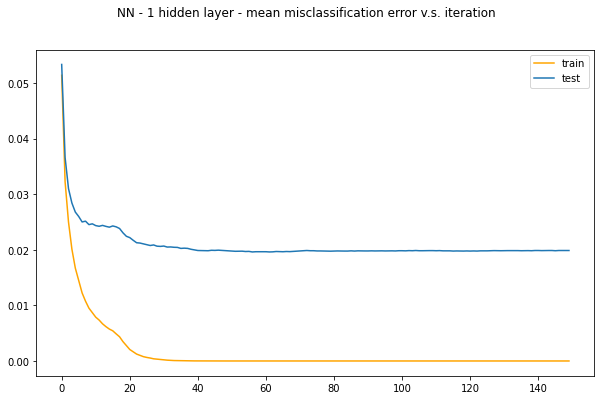

In [ ]:
draw_path_avg(n_epochs, train_acc, test_acc)

## 3.(c)
Visualize your best results of the learned W as one hundred 28×28 images (plot all filters
as one image, as we have seen in class). Do the learned features exhibit any structure?

In [ ]:
def draw_learned_W(model_best, width = 28, long = 28):

# Pick the best model
    model_weights = [] 
    conv_layers = [] 
    model_children = list(model_best.children())
    print(model_children)

    # counter to keep count of the conv layers
    counter = 0 
    # append all the conv layers and their respective weights to the list
    for i in range(len(model_children)):
        model_weights.append(model_children[i].weight.detach().cpu().numpy())
        conv_layers.append(model_children[i])

    # visualize the first conv layer filters
    model_weights = model_weights[:-1]
    plt.figure(figsize=(20, 17))
    for layer in model_weights:
        for i in range(len(layer)):
            plt.subplot(10, 10, i+1) # we have 5x5 filters and total of 16 (see printed shapes)
            filter = layer[i].reshape(width,long)
            plt.imshow(filter, cmap='viridis')
            plt.axis('off')
            # plt.savefig('filter1.png')
        plt.show()

[Linear(in_features=784, out_features=100, bias=True), Linear(in_features=100, out_features=10, bias=True)]


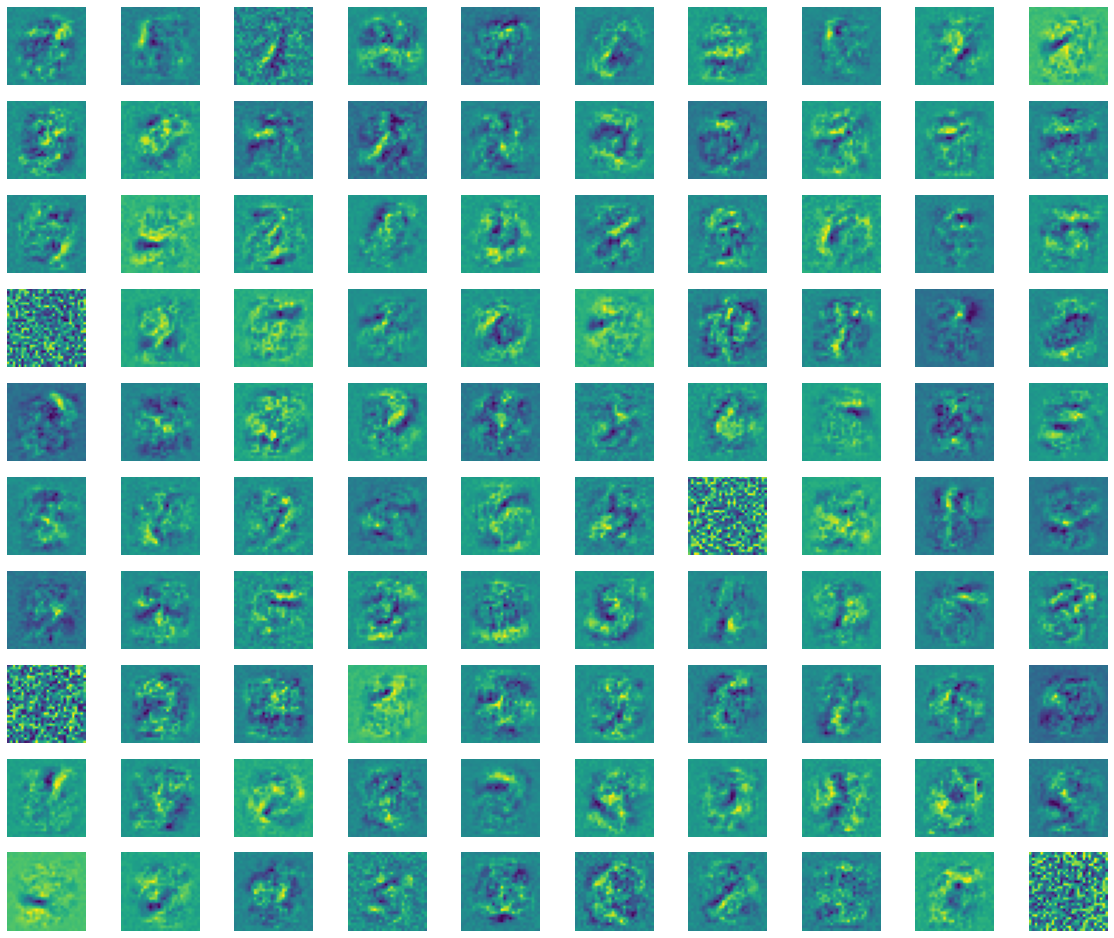

In [ ]:
# Pick the best model
# model_best = torch.jit.load('modelNN1_234_model.pt')
model_best = torch.load('best_modelNN1.pt')
model_best.eval()
#list(model_best.children())
draw_learned_W(model_best)

## 3.(d)
Try different values of the learning rate. You should start with a learning rate of 0.1. You should then reduce it to .01, and increase it to 0.2 and 0.5. What happens to the convergence properties of the algorithm (looking at both average cross entropy and % incorrect)? Try momentum of 0.0, 0.5, 0.9. How does momentum affect convergence rate? How would you choose the best value of these parameters?

In [ ]:
cnn1_accuracy_summary = []
loss_groups, train_acc_groups, test_acc_groups = [],[],[]

opti_groupsLR =[[0.01, 0], [0.2, 0], [0.5, 0],
                [0.01, 0.5], [0.2, 0.5], [0.5, 0.5],
                [0.01, 0.9], [0.2, 0.9], [0.5, 0.9]]
# def tt(seed, model, prefix, lr = 0.1, monm = 0, criterion = nn.CrossEntropyLoss()):
for i in range(len(opti_groupsLR)):
    model_1 = Net1()
    model_1 = model_1.to(device)  
    model, LOSS, train_ACC, test_ACC = tt(seed = 234, model = model_1, prefix = f'modelNN1_{seed}',
                                   lr = opti_groupsLR[i][0], monm = opti_groupsLR[i][1])
    loss_groups.append(LOSS)
    train_acc_groups.append(train_ACC)
    test_acc_groups.append(test_ACC)


New trial: 100%|██████████| 150/150 [33:28<00:00, 13.39s/it]


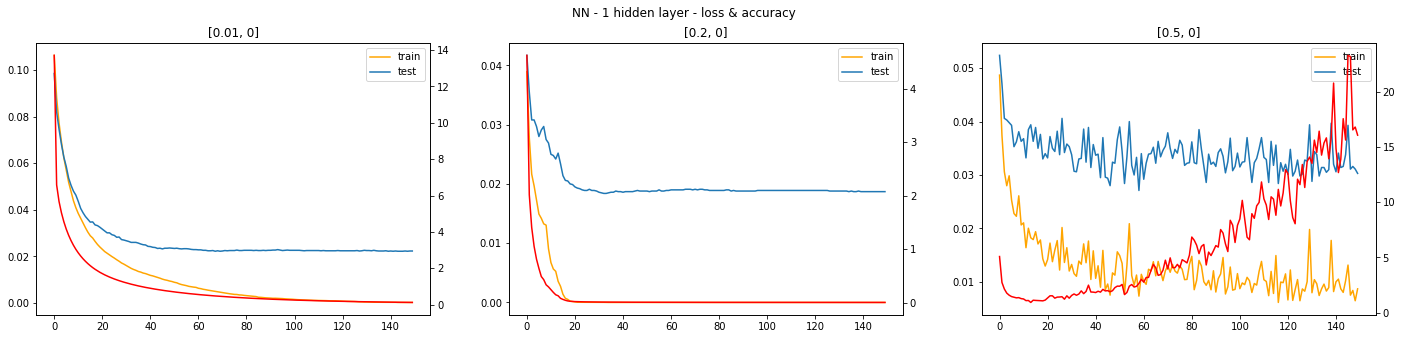

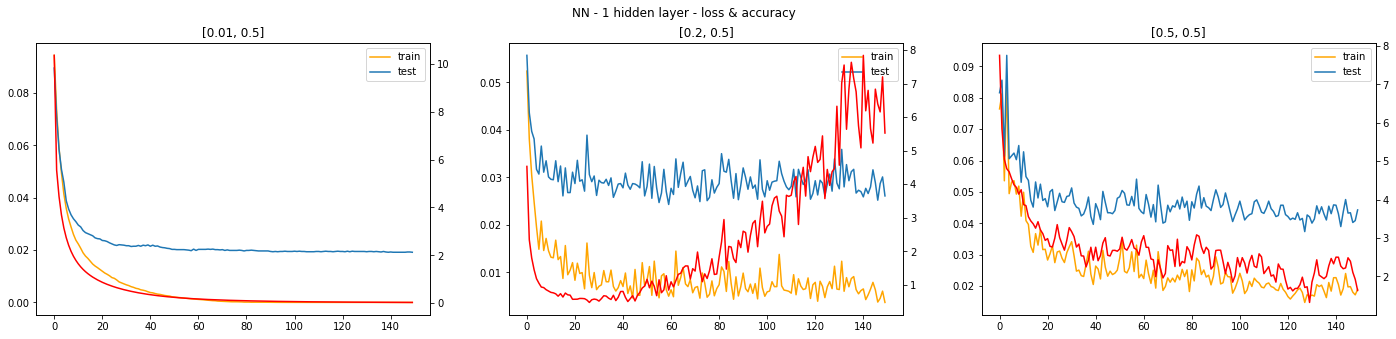

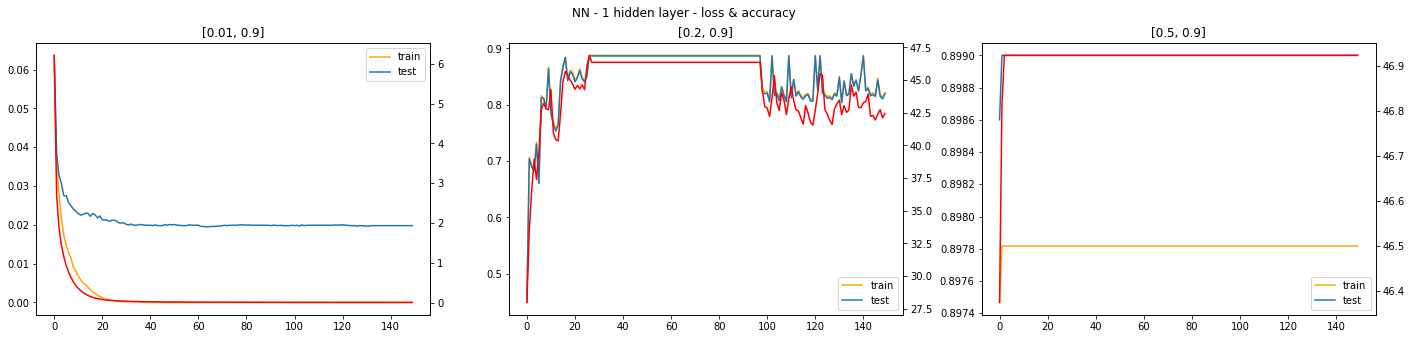

In [ ]:
def draw_path_entropy(trial, subs, n_epochs, loss_groups, train_acc, test_acc):
    fig, axes = plt.subplots(1, subs, figsize=(subs*8, 5))
    fig.suptitle('NN - 1 hidden layer - loss & accuracy')
    for i in range(len(trial)):
        ax = axes[i]
        axes[i].set_title(trial[i])
        sns.lineplot(ax=ax, x = list(range(n_epochs)), y = train_acc[i], color = 'orange', label='train')
        sns.lineplot(ax=ax, x = list(range(n_epochs)), y = test_acc[i], label='test')
        
        axes2 = ax.twinx()
        sns.lineplot(ax=axes2, x = list(range(n_epochs)), y = loss_groups[i], color = 'red')

for i in range(3):
    draw_path_entropy(opti_groupsLR[i*3:(i+1)*3], 3, n_epochs, 
                      loss_groups[i*3:(i+1)*3], train_acc_groups[i*3:(i+1)*3], test_acc_groups[i*3:(i+1)*3])


## 4. 
Redo part 3(a) - 3(d) with a CNN i.e. with one 2-D convolutional layers → Relu activation → Maxpooling with appropriate hyperparameters. Compare the best result from the single layer neural network and the CNN, what could you conclude?

In [ ]:
# Define the model2
# import libraries
# [20, 1, 28, 28]
# N -> the batch size
# C -> Nb of channels
# H -> Height
# W -> Width

# define the NN architecture
class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()

        self.conv1 = nn.Conv2d(1,6,5, padding = 2)
        self.out = nn.Linear(6 * 14 * 14, 10)

    def forward(self, x):
        # flatten image input
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = self.out(x)

        return x

# initialize the NN
model_2 = Net2()
model_2 = model_2.to(device)
# model.cuda()
print(model_2)

Net2(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (out): Linear(in_features=1176, out_features=10, bias=True)
)


Step 1: Find the seed

New trial: 100%|██████████| 150/150 [35:35<00:00, 14.24s/it]


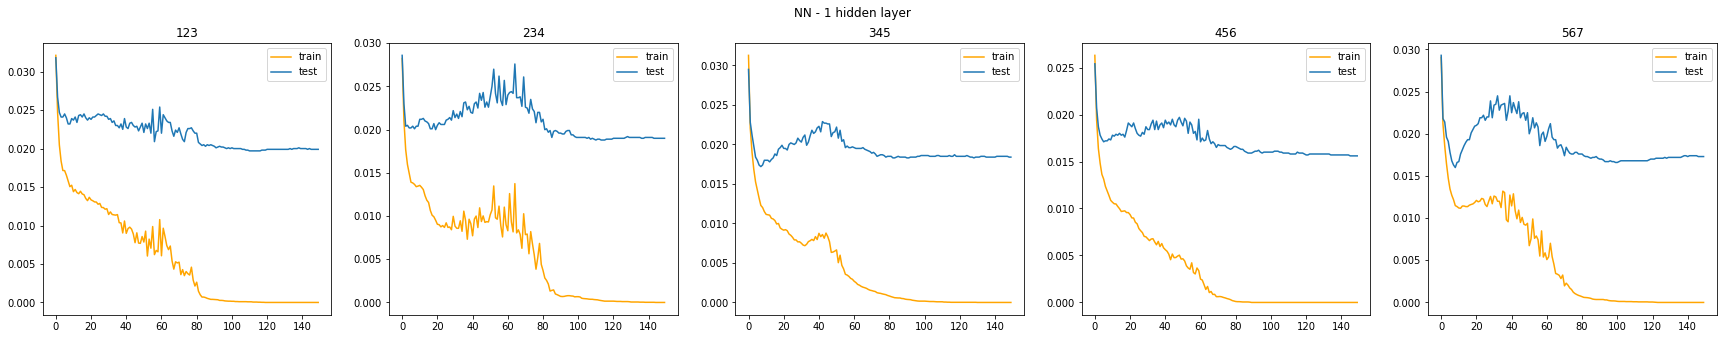

In [ ]:
cnn1_accuracy_summary = []
train_acc_conv2, test_acc_conv2 = [],[]

trial = [123,234,345,456,567]
for seed in trial:
    model_2 = Net2()
    model_2 = model_2.to(device)
    model, LOSS, train_ACC_conv2, test_ACC_conv2 = tt(seed, model_2, 'modelCONV2')
    if len(test_acc_conv2) == 0:
        best_model = model
    else:
        if test_acc_conv2[-1][-1] > test_ACC_conv2[-1]:
            best_model = model
    train_acc_conv2.append(train_ACC_conv2)
    test_acc_conv2.append(test_ACC_conv2)

prefix = 'modelCONV2'
name = f"/content/best_{prefix}.pt" #.onnx
torch.save(best_model, name)

draw_path(trial, 5, n_epochs, train_acc_conv2, test_acc_conv2)

Step 2: Average measurement

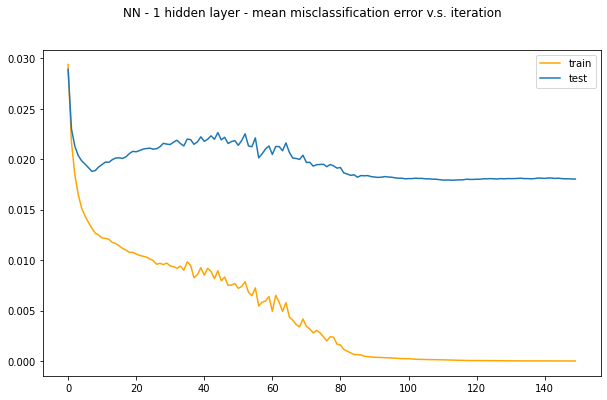

In [ ]:
draw_path_avg(n_epochs, train_acc_conv2, test_acc_conv2)

Step 3: Visualize your best results of the learned W

[Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2)), Linear(in_features=1176, out_features=10, bias=True)]


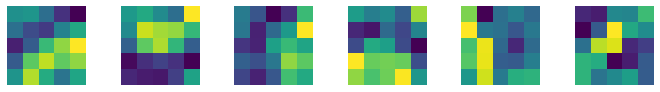

In [ ]:
model_best_conv1 = torch.load('best_modelCONV2.pt')
model_best_conv1.eval()
draw_learned_W(model_best_conv1, width = 5, long = 5)

Step 4: Try different parameters

In [ ]:
cnn1_accuracy_summary = []
loss_groups, train_acc_groups, test_acc_groups = [],[],[]

for i in range(len(opti_groupsLR)):
    model_2 = Net2()
    model_2 = model_2.to(device)
    model, LOSS, train_ACC, test_ACC = tt(seed = 456, model = model_2, prefix = f'modelCONV2_{seed}',
                                   lr = opti_groupsLR[i][0], monm = opti_groupsLR[i][1])
    loss_groups.append(LOSS)
    train_acc_groups.append(train_ACC)
    test_acc_groups.append(test_ACC)

New trial: 100%|██████████| 150/150 [35:28<00:00, 14.19s/it]


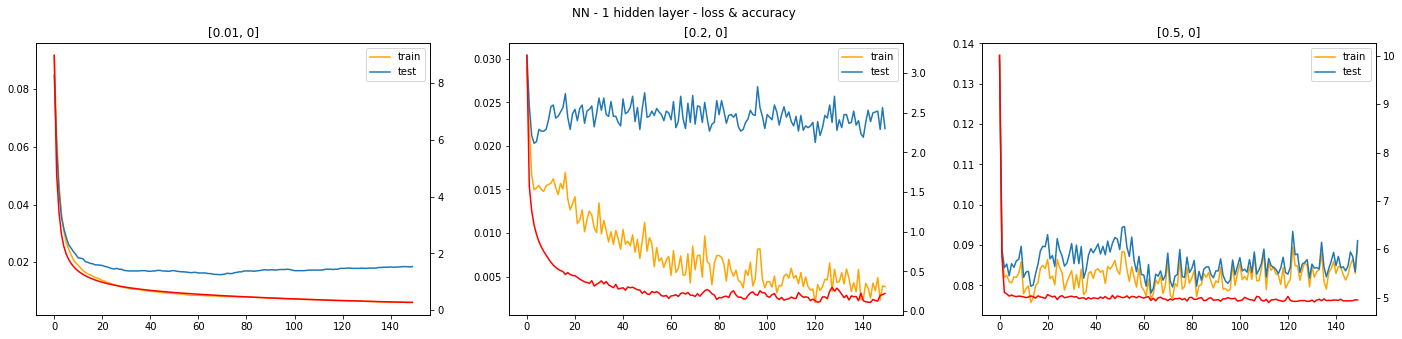

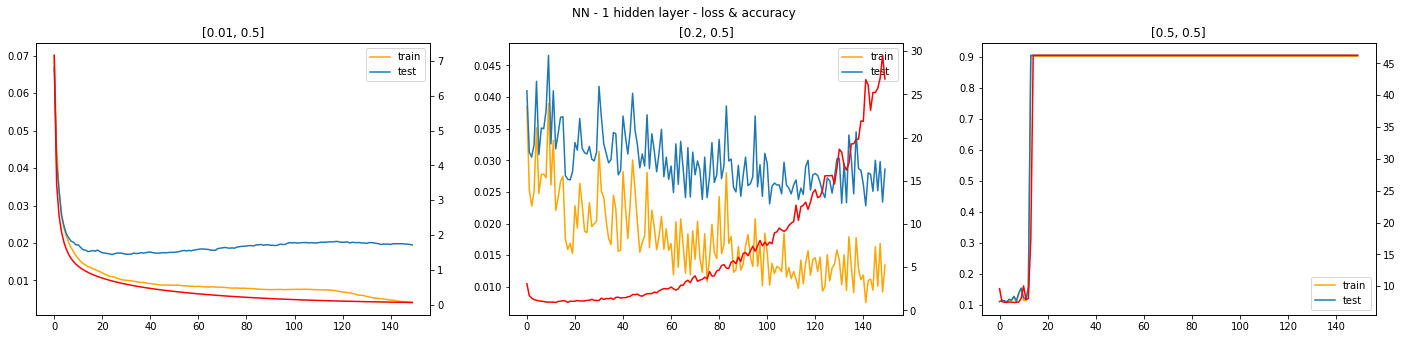

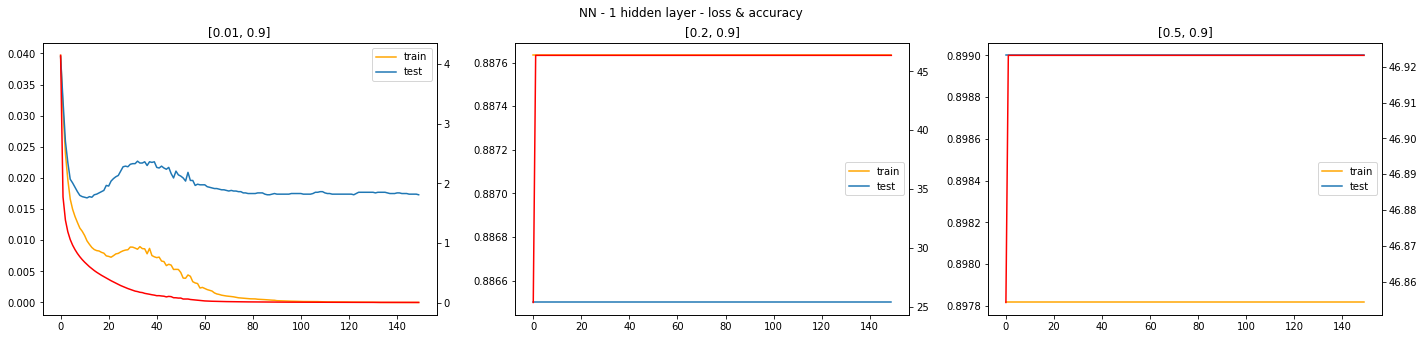

In [ ]:
for i in range(3):
    draw_path_entropy(opti_groupsLR[i*3:(i+1)*3], 3, n_epochs, 
                      loss_groups[i*3:(i+1)*3], train_acc_groups[i*3:(i+1)*3], test_acc_groups[i*3:(i+1)*3])

## 5.

In [ ]:
class Net3(nn.Module):
    def __init__(self):
        super(Net3, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels= 16, kernel_size= 5, stride=1, padding=0 )
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=64, kernel_size=5, stride= 1, padding= 2)
        self.batch1 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride= 1, padding= 1)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.batch2 = nn.BatchNorm2d(128)
        self.conv5 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.batch3 = nn.BatchNorm2d(256)
        self.fc1  = nn.Linear(in_features= 2304, out_features= 512)
        self.fc2  = nn.Linear(in_features= 512, out_features= 128)
        self.fc3 = nn.Linear(in_features=128 , out_features=10)


    def forward(self,x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x,2)
        x = self.batch1(x)
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = F.max_pool2d(x,2)
        x = self.batch2(x)
        x = F.relu(self.conv5(x))
        x = F.max_pool2d(x,2)
        x = self.batch3(x)
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


model_3 = Net3()
model_3 = model_3.to(device)
print(model_3)

Net3(
  (conv1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(16, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (batch1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batch2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batch3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=2304, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


Step 1: Find the seed

In [ ]:
cnn1_accuracy_summary = []
train_acc_conv3, test_acc_conv3 = [],[]
# trial = [567]
trial = [123,234,345,456,567]
for seed in trial:
    model_3 = Net3()
    model_3 = model_3.to(device)
    model, LOSS, train_ACC_conv3, test_ACC_conv3 = tt(seed, model_3, 'modelCONV3')
    if len(test_acc_conv3) == 0:
        best_model = model
    else:
        if test_acc_conv3[-1][-1] > test_ACC_conv3[-1]:
            best_model = model
    train_acc_conv3.append(train_ACC_conv3)
    test_acc_conv3.append(test_ACC_conv3)

prefix = 'modelCONV3'
name = f"/content/best_{prefix}.pt" #.onnx
torch.save(best_model, name)

draw_path(trial, 5, n_epochs, train_acc_conv3, test_acc_conv3)

New trial:  97%|█████████▋| 145/150 [1:09:52<02:24, 28.85s/it]

Step 2: Average measurement

In [ ]:
draw_path_avg(n_epochs, train_acc_conv3, test_acc_conv3)

Step 3: Visualize your best results of the learned W

In [ ]:
def draw_conv_filter(model):
    model_weights = [] 
    conv_layers = [] 
    model_children = list(model.children())

    # counter to keep count of the conv layers
    counter = 0 
    # append all the conv layers and their respective weights to the list
    for i in range(len(model_children)):
        if type(model_children[i]) == nn.Conv2d:
            counter += 1
            model_weights.append(model_children[i].weight)
            conv_layers.append(model_children[i])
        elif type(model_children[i]) == nn.Sequential:
           for j in range(len(model_children[i])):
              for child in model_children[i][j].children():
                  if type(child) == nn.Conv2d:
                      counter += 1
                      model_weights.append(child.weight)
                      conv_layers.append(child)
    print(f"Total convolutional layers: {counter}")

    # visualize the first conv layer filters
    plt.figure(figsize=(20, 17))
    for i in range(len(model_weights)):
        for j, filter in enumerate(model_weights[i]):
            size = int(np.ceil(np.sqrt(len(model_weights[i]))))
            plt.subplot(size, size, j+1) # we have 5x5 filters and total of 16 (see printed shapes)
            plt.imshow(filter[0, :, :].detach().cpu().numpy(), cmap='viridis')
            plt.axis('off')
            # plt.savefig('conv2_filter1.png')
        plt.show()
        print(f'======= Conv filter {i} =======')
    
    return model_weights

In [ ]:
model_best_conv3 = torch.load('best_modelCONV3.pt')
model_best_conv3.eval()
conv3_filters_weight = draw_conv_filter(model_best_conv3)

Step 4: Try different parameters

In [ ]:
cnn1_accuracy_summary = []
loss_groups, train_acc_groups, test_acc_groups = [],[],[]
seed = 456 # the best

for i in range(len(opti_groupsLR)):
    model_3 = Net3()
    model_3 = model_3.to(device)
    model, LOSS, train_ACC, test_ACC = tt(seed = seed, model = model_3, prefix = f'modelCONV3_{seed}',
                                   lr = opti_groupsLR[i][0], monm = opti_groupsLR[i][1])
    loss_groups.append(LOSS)
    train_acc_groups.append(train_ACC)
    test_acc_groups.append(test_ACC)

In [ ]:
for i in range(3):
    draw_path_entropy(opti_groupsLR[i*3:(i+1)*3], 3, n_epochs, 
                      loss_groups[i*3:(i+1)*3], train_acc_groups[i*3:(i+1)*3], test_acc_groups[i*3:(i+1)*3])

# 5.
In this part, you are working with train.txt, val.txt and test.txt. In particular, train.txt contains 20,000 lines and val.txt and test.txt contains 5000 lines in the same format. Each line contains 1569 coordinates, with the first 784 real-valued numbers correspond to the 784 pixel values for the first digit, next 784 real valued numbers correspond to the pixel values for the second digit.


In [ ]:
train = np.genfromtxt('train.txt', delimiter=',', dtype="float64")
test = np.genfromtxt('test.txt', delimiter=',', dtype="float64")
validation =  np.genfromtxt('val.txt', delimiter=',', dtype="float64")
train.shape, validation.shape, test.shape

## 6. 
As a warm up question, load the data and plot a few examples. Decide if the pixels were scanned out in row-major or column-major order. What is the relationship between the 2 digits and the last coordinate of each line?

A: The sum of two digits equal to the last number in each line. They are scanned out in row-major.

In [ ]:
loc = train[np.random.randint(1,20000),:]
plt.figure(figsize=(3, 3))
plt.imshow(loc[:-1].reshape(56,28))
plt.title(loc[-1])


In [ ]:
for res in range(2):
    #num1 = dig3[[i for i in range(len(dig3)) if i % 2 == res]]
    nums = loc[[i for i in range(len(loc[:-1])) if i % 2 == res]]
    plt.figure(figsize=(3, 3))
    plt.imshow(nums.reshape(28,28))
    plt.title(loc[-1])  
    _ = plt.axis("off")


## 7.
Repeat part 3(a) - 3(d) with at least two of your favorite deep learning architecture (e.g., introducing batch normalization, introducing dropout in training) with respect to with train.txt, val.txt and test.txt. In particular,
(a) Using train.txt to train your models.
(b) Using the validation error (i.e., the performance on val.txt) to select the best model.
(c) Report the generalization error (i.e., the performance on test.txt) for the model you picked. How would you compare the test errors you obtained with respect to the original MNIST data? Explain why you cannot obtain a test error lower than 1%.

### 7.1 Model I

In [ ]:
TR = []
for j in range(len(train)):
    line = train[j]
    line1 = line[[i for i in range(len(train[j][:-1])) if i % 2 == 1]]
    #line2 = line[[i for i in range(len(train[j][:-1])) if i % 2 == 0]]
    TR.append(line1.reshape(1, 28,28))
TR = np.array(TR)

TEST = []
for j in range(len(test)):
    line = test[j]
    line1 = line[[i for i in range(len(test[j][:-1])) if i % 2 == 1]]
    #line2 = line[[i for i in range(test[j][:-1])) if i % 2 == 0]]
    TEST.append(line1.reshape(1, 28,28))
TEST = np.array(TEST)

VAL = []
for j in range(len(validation)):
    line = validation[j]
    line1 = line[[i for i in range(len(validation[j][:-1])) if i % 2 == 1]]
    #line2 = line[[i for i in range(test[j][:-1])) if i % 2 == 0]]
    VAL.append(line1.reshape(1, 28,28))
VAL = np.array(VAL)

In [ ]:
TR.shape, TEST.shape, VAL.shape

In [ ]:
np.max(train[:,-1]), np.max(test[:,-1]), np.max(validation[:,-1])

In [ ]:
np.min(train[:,-1]), np.min(test[:,-1]), np.min(validation[:,-1])

In [ ]:
class Net4(nn.Module):
    def __init__(self):
        super(Net4, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels= 16, kernel_size= 5, stride=1, padding=0 )
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=64, kernel_size=5, stride= 1, padding= 2)
        self.batch1 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride= 1, padding= 1)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.batch2 = nn.BatchNorm2d(128)
        self.conv5 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.batch3 = nn.BatchNorm2d(256)
        self.fc1  = nn.Linear(in_features= 2304, out_features= 512)
        self.fc2  = nn.Linear(in_features= 512, out_features= 128)
        self.fc3 = nn.Linear(in_features=128 , out_features=19)


    def forward(self,x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x,2)
        x = self.batch1(x)
        #x = F.batch_norm(x, affine=None, running_var=None)
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = F.max_pool2d(x,2)
        x = self.batch2(x)
        #x = F.batch_norm(x, running_mean=None, running_var=None)
        x = F.relu(self.conv5(x))
        x = F.max_pool2d(x,2)
        x = self.batch3(x)
        #x = F.batch_norm(x, running_mean=None, running_var=None)
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


model_4 = Net4()
model_4 = model_4.to(device)
# model.cuda()
print(model_4)

In [ ]:
from torch.utils.data import DataLoader, TensorDataset

# create tensor dataset
train_data2 = TensorDataset(torch.from_numpy(TR), torch.from_numpy(train[:,-1]))
val_data2 = TensorDataset(torch.from_numpy(VAL), torch.from_numpy(validation[:,-1]))

batch_size = 20

# shuffle data
train_loader = DataLoader(train_data2, shuffle=True, batch_size=batch_size, drop_last=True)
test_loader = DataLoader(val_data2, shuffle=True, batch_size=batch_size, drop_last=True)


In [ ]:
def tt(seed, model, prefix, lr = 0.1, monm = 0, criterion = nn.CrossEntropyLoss()):
    torch.manual_seed(seed)

    optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=monm)

    model.train() 
    LOSS, train_ACC, test_ACC  = [],[],[]
    for epoch in trange(n_epochs, desc='New trial'):
        sleep(0.01)
        # monitor training loss
        train_loss = 0.0
        t0 = time.time()
        ###################
        # train the model #
        ###################
        for data, target in train_loader: #train_loader:train_labels = to_categorical(Y_train)
            data, target = data.type(torch.FloatTensor), target.type(torch.LongTensor)
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()

            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()*data.size(0)
                
        # print training statistics 
        # calculate average loss over an epoch
        train_loss = train_loss/len(train_loader)
        LOSS.append(train_loss)


        train_error = 0
        for traindata, traintarget in train_loader:
            traindata = traindata.type(torch.FloatTensor)
            traindata = traindata.to(device)
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(traindata)
            _, pred = torch.max(output, 1)
            pred = pred.cpu().numpy()
            train_error += errorrate(pred,traintarget.numpy())/len(train_loader)
        train_ACC.append(train_error)

        test_error = 0
        for testdata, testtarget in test_loader:
            testdata = testdata.type(torch.FloatTensor)
            testdata = testdata.to(device)
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(testdata)
            _, pred = torch.max(output, 1)
            pred = pred.cpu().numpy()
            test_error += errorrate(pred,testtarget.numpy())/len(test_loader)
        test_ACC.append(test_error)
        

        # print('Epoch: {} \tEpoch runtime: {:.2f} \tTraining Loss: {:.6f} \tTest Loss:{:.6f}'.format(
        #     epoch+1, 
        #     time.time() - t0,
        #     train_error,
        #     test_error
        #     ))

      
    return model, LOSS, train_ACC, test_ACC
    

# cnn_accuracy = accuracy_score(Y_test, cnn_prediction)
# print('FINAL Test Error of a CNN is: ', errorrate(cnn_prediction,Y_test))
# print('FINAL Accuracy_score of a CNN is: ', cnn_accuracy)

Step 1: Find the seed

In [ ]:
cnn1_accuracy_summary = []
train_acc_conv4, test_acc_conv4 = [],[]
lr = 0.1

trial = [123,234,345,456,567]
for seed in trial:
    model_4 = Net4()
    model_4 = model_4.to(device)
    model, LOSS, train_ACC_conv4, test_ACC_conv4 = tt(seed, model_4, 'newdata_modelCONV4')
    if len(test_acc_conv4) == 0:
        best_model = model
    else:
        if test_acc_conv4[-1][-1] > test_ACC_conv4[-1]:
            best_model = model

    train_acc_conv4.append(train_ACC_conv4)
    test_acc_conv4.append(test_ACC_conv4)

prefix = 'newdata_modelCONV4'
name = f"/content/best_{prefix}.pt" #.onnx
torch.save(best_model, name)

draw_path(trial, 5, n_epochs, train_acc_conv4, test_acc_conv4)

Step 2: Average measurement

In [ ]:
draw_path_avg(n_epochs, train_acc_conv4, test_acc_conv4)

Step 3: Visualize your best results of the learned W

In [ ]:
model_best_conv4 = torch.load('best_newdata_modelCONV4.pt')
model_best_conv4.eval()
conv4_filters_weight = draw_conv_filter(model_best_conv4)

Step 4: Try different parameters

In [ ]:
cnn1_accuracy_summary = []
loss_groups, train_acc_groups, test_acc_groups = [],[],[]
seed = 456 # the best

for i in range(len(opti_groupsLR)):
    model_4 = Net4()
    model_4 = model_4.to(device)
    model, LOSS, train_ACC, test_ACC = tt(seed = seed, model = model_4, prefix = f'newdata_modelCONV4_{seed}',
                                   lr = opti_groupsLR[i][0], monm = opti_groupsLR[i][1])
    loss_groups.append(LOSS)
    train_acc_groups.append(train_ACC)
    test_acc_groups.append(test_ACC)

In [ ]:
for i in range(3):
    draw_path_entropy(opti_groupsLR[i*3:(i+1)*3], 3, n_epochs, 
                      loss_groups[i*3:(i+1)*3], train_acc_groups[i*3:(i+1)*3], test_acc_groups[i*3:(i+1)*3])

### 7.2 Model II

In [ ]:
class Net5(nn.Module):
    def __init__(self):
        super(Net5, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels= 16, kernel_size= 5, stride=1, padding=0 )
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=64, kernel_size=5, stride= 1, padding= 2)
        self.batch1 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride= 1, padding= 1)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.batch2 = nn.BatchNorm2d(128)
        self.conv5 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.batch3 = nn.BatchNorm2d(256)
        self.fc1  = nn.Linear(in_features= 2304, out_features= 512)
        self.fc2  = nn.Linear(in_features= 512, out_features= 128)
        self.fc3 = nn.Linear(in_features=128 , out_features=19)
        self.dropout = nn.Dropout(0.25)


    def forward(self,x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x,2)
        x = self.batch1(x)
        x = self.dropout(x)
        #x = F.batch_norm(x, affine=None, running_var=None)
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = F.max_pool2d(x,2)
        x = self.batch2(x)
        x = self.dropout(x)
        #x = F.batch_norm(x, running_mean=None, running_var=None)
        x = F.relu(self.conv5(x))
        x = F.max_pool2d(x,2)
        x = self.batch3(x)
        x = self.dropout(x)
        #x = F.batch_norm(x, running_mean=None, running_var=None)
        x = x.reshape(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


model_5 = Net5()
model_5 = model_5.to(device)
# model.cuda()
print(model_5)

Step 1: Find the seed

In [ ]:
cnn1_accuracy_summary = []
train_acc_conv5, test_acc_conv5 = [],[]
lr = 0.1

trial = [123,234,345,456,567]
for seed in trial:
    model_5 = Net5()
    model_5 = model_5.to(device)
    model, LOSS, train_ACC_conv5, test_ACC_conv5 = tt(seed, model_5, 'newdata_modelCONV5')
    if len(test_acc_conv5) == 0:
        best_model = model
    else:
        if test_acc_conv5[-1][-1] > test_ACC_conv5[-1]:
            best_model = model

    train_acc_conv5.append(train_ACC_conv5)
    test_acc_conv5.append(test_ACC_conv5)

prefix = 'newdata_modelCONV5'
name = f"/content/best_{prefix}.pt" #.onnx
torch.save(best_model, name)

draw_path(trial, 5, n_epochs, train_acc_conv5, test_acc_conv5)

Step 2: Average measurement

In [ ]:
draw_path_avg(n_epochs, train_acc_conv5, test_acc_conv5)

Step 3: Visualize your best results of the learned W

In [ ]:
model_best_conv5 = torch.load('best_newdata_modelCONV5.pt')
model_best_conv5.eval()
conv5_filters_weight = draw_conv_filter(model_best_conv5)

Step 4: Try different parameters

In [ ]:
cnn1_accuracy_summary = []
loss_groups, train_acc_groups, test_acc_groups = [],[],[]
seed = 456 # the best

for i in range(len(opti_groupsLR)):
    model_5 = Net5()
    model_5 = model_5.to(device)
    model, LOSS, train_ACC, test_ACC = tt(seed = seed, model = model_5, prefix = f'newdata_modelCONV5{seed}',
                                   lr = opti_groupsLR[i][0], monm = opti_groupsLR[i][1])
    loss_groups.append(LOSS)
    train_acc_groups.append(train_ACC)
    test_acc_groups.append(test_ACC)

In [ ]:
for i in range(3):
    draw_path_entropy(opti_groupsLR[i*3:(i+1)*3], 3, n_epochs, 
                      loss_groups[i*3:(i+1)*3], train_acc_groups[i*3:(i+1)*3], test_acc_groups[i*3:(i+1)*3])